### Random Forests and Boosting

These methods use trees as building blocks to build more complex models.

We will use the BOSTON housing data set to explore RANDOM FORESTS and BOOSTING. 

These data are in the 'MASS' package.

It gives housing values and other stats in each of 506 suburbs of Boston based on a 1970 census. 

### Random Forests

Random Forests build lots of bushy trees, and the average them to reduce the variance.

In [2]:
install.packages('randomForest')

Installing package into 'C:/Users/Diego/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\Rtmp25z5cd\downloaded_packages


In [3]:
require(randomForest)
require(MASS)

Loading required package: randomForest

Warning message:
"package 'randomForest' was built under R version 3.6.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [5]:
set.seed(101)
dim(Boston)

[1] 506  14

In [6]:
#training size of 300 from Boston data set
train<-sample(1:nrow(Boston),300)

In [8]:
?sample

In [7]:
#demographics, crime, age of house, etc.
?Boston

REESPONSE (y) == medv (median value of owner-occupied homes in \$1000s.

Lets fit a RANDOM FOREST and see how well it performs.

We will use the response 'medv'

In [10]:
#fit training data
rf.boston<-randomForest(medv~.,data=Boston,subset=train)


500 trees 

summary of fit

mean squared residual-- out-of-bag mean squared residuals (see lecture). So each observation was predicted using the average of
trees that didn't include it.  de-biased estimates of
prediction error.

percentage variance explained.

In [13]:
names(rf.boston)

[1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"

mtry == number of vars selected at each split of each tree. 

IN this case, 4 vars selcted at random, each time you come to a split node, 4 would be selected at random, and then the split would be confiend to one of those variables.

How RF de-correlates trees 

In [16]:
rf.boston$'mtry'

[1] 4

In [19]:
#rf.boston

The MSR and % variance explained are based on OOB (out-og-bag) estimates, a clever device in Random Forests to get honest error estimates. 

The model reports that 'mtry=4', which is the number of variables randomly chosen at each split. 

Since $p=13$ here, we could try all 13 possible values of 'mtry'. 

We will do so, record the results for a number of trees, and make a plot.

In [20]:
#13 zeros
oob.err<-double(13)
oob.err

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0

fit a series of randomForests.

There are 13 variables, so we're going to have mtry range through the values 1 to 13.

 record the errors.
 
 set up two variables to do the
recording of the errors.
And then we're going to loop for mtry in 1 to 13.

We're going to fit the randomForest with that value of mtry.

we'll just restrict the number of trees to be 400,
for no good reason, except that 400 is sufficient here.

give mtry as an argument.
And of course, its fit on the training data.

we can straightaway extract the mean squared
error, because that's out-of-bag error, that's on
the object.

then we predict on the test data.
So there's Boston minus train, and passed as the data in the
argument to predict.

In [28]:
#record errors
oob.err<-double(13)
test.err<-double(13)

#fit trees w/ diff num of vars at each split
#400 trees per model
for (mtry in 1:13){
    #fit on training data
    fit<-randomForest(medv~.,
     data=Boston,subset=train,mtry=mtry,
     ntree=400)
    #extract Mean Squared Error and put in var
    oob.err[mtry]<-fit$mse[400]
    #predict on testing data
    #fit is the fit of the Random Forest
    pred<-predict(fit,Boston[-train,])
    #test error (MSE) = (actual - pred)^2
    test.err[mtry]<-with(Boston[-train,],
     mean((medv-pred)^2))
    #Concatenate and Print
    cat(mtry, " ")
}

1  2  3  4  5  6  7  8  9  10  11  12  13  

In [29]:
#?cat

 13 times 400 trees have been grown here.
 
use a math plot command, because we've
got two columns.

got test.error and
out-of-bag dot error, oob.error.

c bind them together to make a two column matrix.
And then we make a single plot with math plot.

 type equals b means, type equals both.
It means it plots both points and connect them with lines.

 ylab mean square error.
 
 put a legend in the top right corner.

Iterepretation of the Plot:

test error a bit higher

But be warned, there's a lot of variability in these test
error estimates.
And so since the out-of-bag was computer on one data set
and the test error on a different data set, and they
weren't very large, these differences are pretty much
well within the standard errors.

And don't get fooled by the fact that the red curve is
smoothly above the blue curve.
These error estimates are very correlated, because the
randomForest with mtry equals 4 is very similar to the one
with mtry equals 5.
And so that's why these curves, or each of the curves
is quite smooth.


What we do see is that mtry try around 6 seems to be about
the best, at least for the test error.
For the out-of-bag error, around about 7.

Good performance

Just two points to note here.
On the left-hand side is the performance of a single tree.
So this will be a bushy tree.
But that's the performance of a single bushy tree.
And the mean squared error on out-of-bag is 23.
And we drop down to about just over 11, here. (REDUCED error by half)


Right side, we use all 13 variables (ie, BAGGING)

RF == reduces variance by growing big trees and avging. 

Boosting, on the other hand, is really going off to bias.
And so boosting grows smaller, stubbier trees
and goes at the bias.

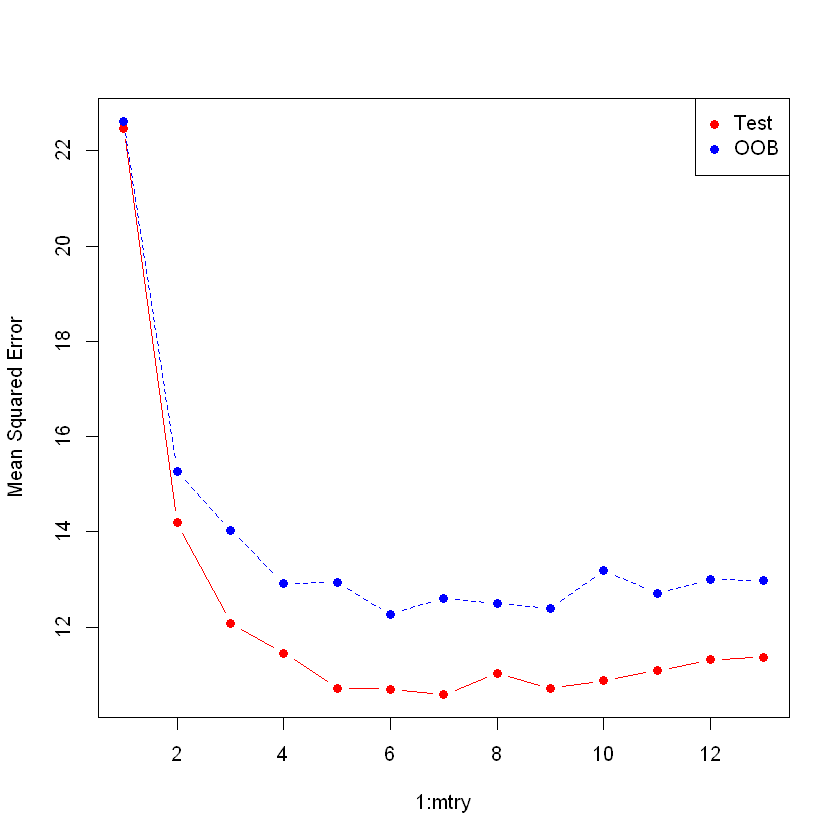

In [58]:
matplot(1:mtry,cbind(test.err,oob.err),
       pch=19,col=c('red','blue'),
       type='b',ylab='Mean Squared Error')
legend('topright',legend=c('Test','OOB'),
      pch=19,col=c('red','blue'))

Not too difficult! Altough the OOB error drops below test-error curve, these are estimates based on data, and so have their own standard errors (which are typically large). Notice that the points at the end with 'mtry=13' correspond to BAGGING.

### Boosting

Boosting builds lots of smaller trees. Unlike random forests, each new tree in boosting tries to patch up the defiencies of the current ensemble.

In [32]:
install.packages('gbm')

Installing package into 'C:/Users/Diego/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependency 'gridExtra'




package 'gridExtra' successfully unpacked and MD5 sums checked
package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\Rtmp25z5cd\downloaded_packages


In [33]:
require(gbm)

Loading required package: gbm

Warning message:
"package 'gbm' was built under R version 3.6.3"
Loaded gbm 2.1.5



GBM asks for the distribution, which is Gaussian, because
we're doing squared error loss.

We're going to ask GBM for 10,000 trees, which sounds
like a lot, but these are going to be shallow trees.

So interaction depth is the number of splits.
So we're going to say we only want 4 splits
in each of the trees. So it will do best first splitting.
And it will stop after 4 splits.

And then shrinkage is 0.01.
So that's how much we're going to shrink the tree step back.

And then shrinkage is 0.01.
So that's how much we're going to shrink the tree step back.

In [35]:
boost.boston<-gbm(medv~.,data=Boston[train,],
        distribution='gaussian',n.trees=10000,
        shrinkage=0.01,interaction.depth=4)

summary does is, it actually gives a variable
importance plot.

wo variables that seem to be the most important.

1) number of rooms.
And this, oh, the second variable is 

2) lstat, which is
the percentage of lower economic status
people in the community.

,var,rel.inf
,<fct>,<dbl>
lstat,lstat,36.379451303
rm,rm,27.975075367
dis,dis,9.591799721
crim,crim,6.037401811
age,age,5.442559141
nox,nox,4.304759477
black,black,3.186801720
ptratio,ptratio,2.498316635
tax,tax,2.092489041


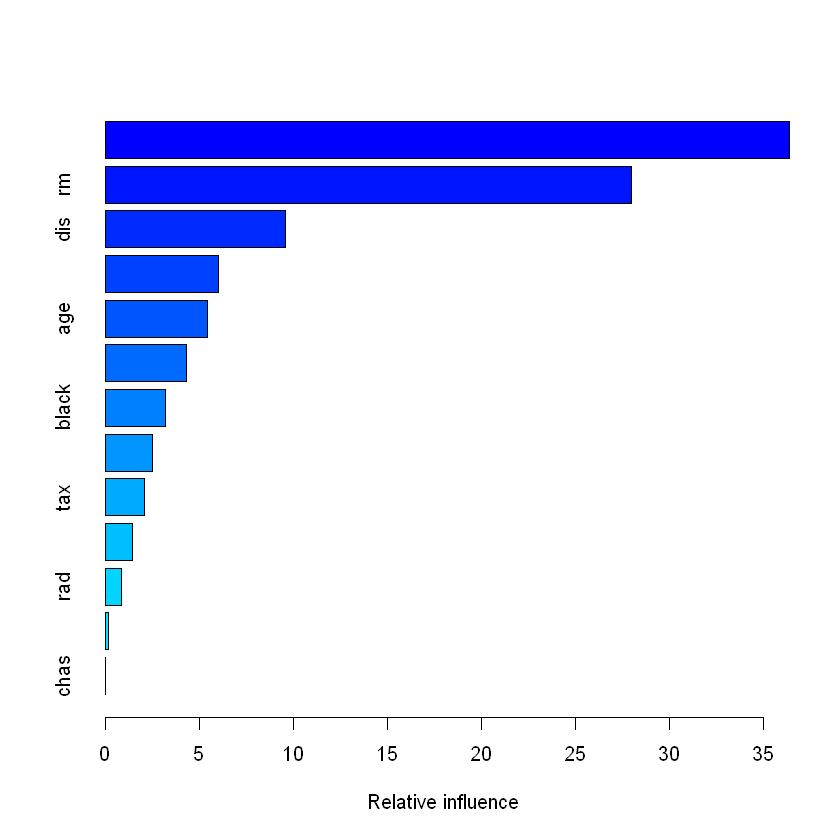

In [37]:
summary(boost.boston)

We can do partial dependence plots.

So let's plot these top two variables.

 kind of a roughly
relationship, but it shows us that the higher the proportion
of lower status people in the suburb, the lower the value of
the house, the housing prices--
not a big surprise there.

reversed relationship with the number of rooms.
The average number of rooms in the house
increases, the price increases.

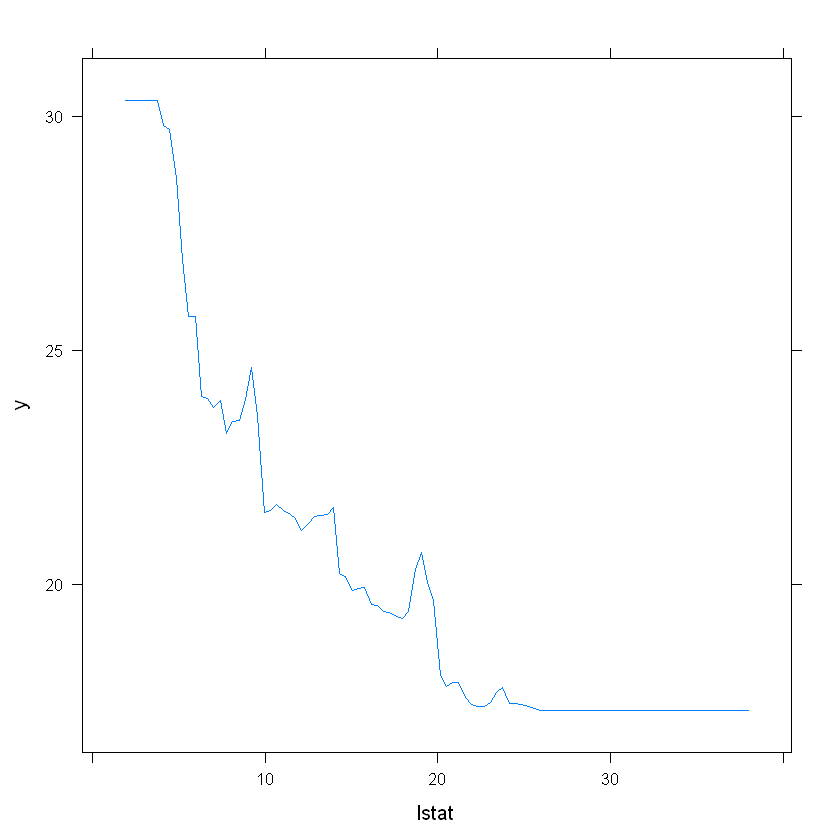

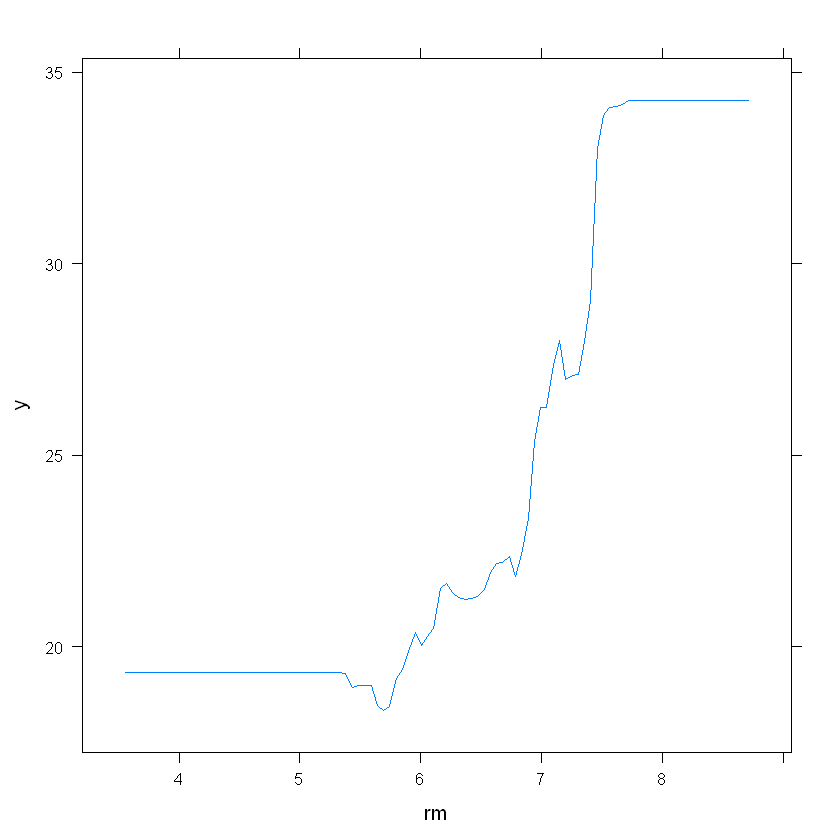

In [38]:
plot(boost.boston,i='lstat')
plot(boost.boston,i='rm')

Lets make a prediction on the test set. With boosting, the number of trees is a tuning paramter, and if we have too many we can overfit. So we should use cross-validation to select the number of trees. We will leave this as an exercise. Istead, we will compute the test error as a function of the number of trees, and make a plot.

we'll just look at the test
performance as a function of the number of trees.

make a grid of number of trees in steps of
100 from 100 to 10,000.

run the Predict function on the boosted model.

And it takes n.dot trees as an argument.

In [40]:
n.trees<-seq(from=100,to=10000,by=100)

In [41]:
predmat<-predict(boost.boston,
    newdata=Boston[-train,],n.trees=n.trees)

And it's produced a matrix of predictions on the test data.
There are 206 test observations.
And you see, we've got 100 different predict vectors at
those 100 different values of tree.

In [42]:
dim(predmat)

[1] 206 100

 compute the test error for each of those.
And we use the Apply function.
So we use our With command again.

And we use the Apply function.
And now predmat are matrix, but medv is our vector.
And so this just recycles this vector.
So that's a little bit of trickery that I often use in
R. 

So this is actually a matrix of differences.
And then we apply to the columns of these square
differences, the mean.
And so that'll computed the column-wise mean squared error
for these guys.

In [44]:
berr<-with(Boston[-train,],
    apply((predmat-medv)^2,2,mean))

And then we'll make a plot.
And we see the boosting error plot.

And it pretty much drops down.
And drops down lower, it looks like, than the randomForest.

This is as a function of the number of trees.

And then it seems to level off, and it doesn't appear to
be increasing.
If you really ramped up the number of trees to a much
bigger number, it would slowly start to increase.

But this is evidence of the claim that boosting is
reluctant to overfit.

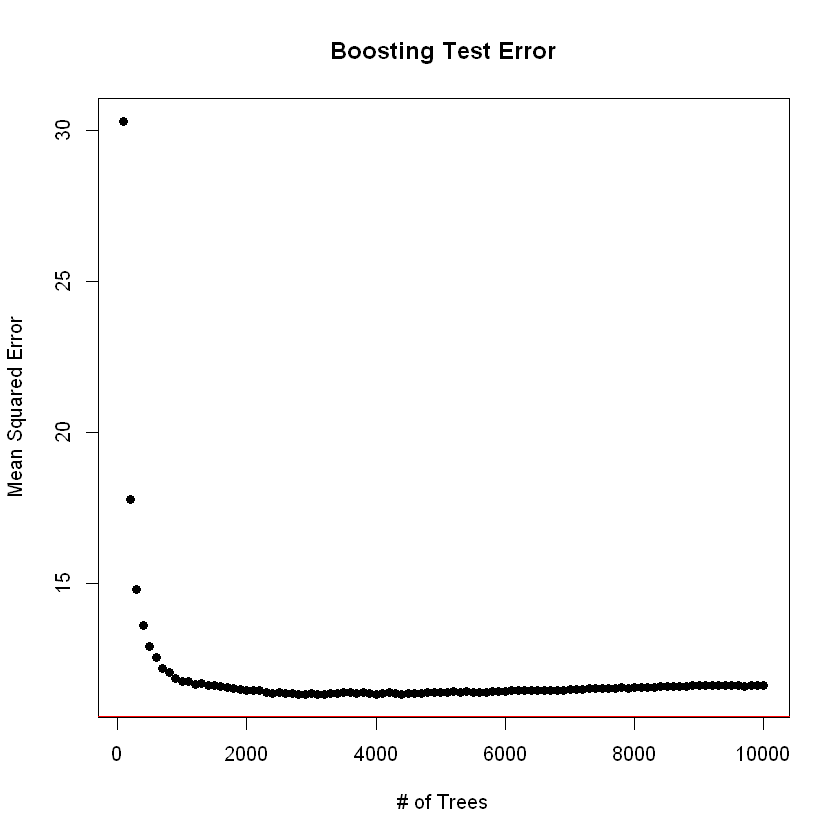

In [57]:
plot(n.trees,berr,pch=19,ylab='Mean Squared Error',
    xlab='# of Trees', main='Boosting Test Error')
#seems really low
#test error for BOOSTING should be lower
abline(h=min(test.err),col='red')

Compare RF (w/ test error) vs BOOSTING

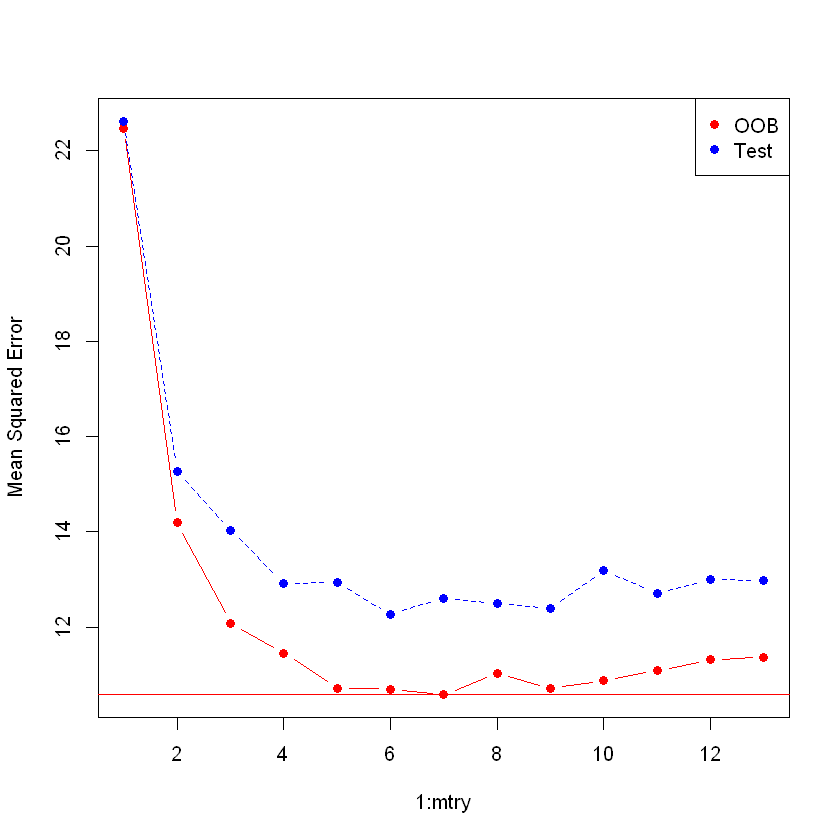

In [51]:
matplot(1:mtry,cbind(test.err,oob.err),
       pch=19,col=c('red','blue'),
       type='b',ylab='Mean Squared Error')
legend('topright',legend=c('OOB', 'Test'),
      pch=19,col=c('red','blue'))
abline(h=min(test.err),col='red')

BOOSTING is better but more tweaks and can overfit w/ too many trees. RF is easier, will not overfit. 

In [59]:
library(tree)

Warning message:
"package 'tree' was built under R version 3.6.3"
